# Section 05 - Data Cleaning in Pandas

- onl01-dtsc-pt-041320
- 05/04/20


## Learning Objectives

<!---
#### Our goals today are to be able to use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting
--->

- Identify missing values in a dataframe using built-in methods 
- Explain why missing values are a problem in data science 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 

- Activity: Data Cleaning in Pandas Project 

## Questions/Comments?

### From the Gdoc

\

___

# Dealing with Missing Data

- [Lesson](https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-05-data-cleaning-in-pandas/dealing-with-missing-data)

## Why is missing data a problem?

> Missing data can be problematic during the Data Science process because `NaN` values in the dataset limit our ability to do important things like:
* Convert data types
* Calculate summary statistics
* Visualize data
* Build models

> Later on in the boot camp, we will be building machine learning models, which generally do NOT accept null values.

## Detecting missing data

### `NaN`s

By default, pandas represents null values with `NaN`, which is short for **_Not a Number_**.  Pandas provides many great ways for checking for null values, built right into DataFrames and Series objects.

#### Detecting `NaN`s

```python
df.isna()
```
```python
df.isna().sum()
```

#### Creating Null Values

- The proper way to create a null value is to use numpy's nan (`np.nan`)

### Placeholder values

#### Numerical data

Numerical columns will often represent missing values with a value that is nonsensical to the column in question.  For instance, in healthcare data, missing values in a `Weight` column may be using impossible values such as `0` or `9999`.  These are valid to the computer, since they are real-numbered, but are obvious to anyone analyzing the data as placeholder values.  
<!---
- **Standard deviation**: If the data is normally distributed (or nearly normal), you can use three standard deviations as a cutoff point. In a normal distribution, three standard devations from the mean in both the directions cover 99.7% of the data, so any values outside this range are highly improbable, and can be safely discarded as outliers. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-dealing-missing-data-onl01-dtsc-pt-041320/master/images/normal_sd_new.png" width="600">


> You will learn more about normal distribution in a later lesson. 


- **Interquartile range (IQR)**: If the data is not normally distribued, you can use the same method boxplots use to determine the outliers -- all observations that lie 1.5 times the IQR (difference between the 75th and the 25th percentiles of the data) away from the median in either direction are treated as outliers. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-dealing-missing-data-onl01-dtsc-pt-041320/master/images/new_boxplot.png" width="600">


> If you need a refresher on IQR, refer to the lesson on _Measures of Dispersion_ in the _Importing and Statistical Analysis of Data_ section of Module 1.

Another way to confirm these values is to check the `.value_counts()` of a column.  In a continuously-valued column, it is probably rare for one specific value to overwhelm all the others.  If, for instance, you see the same numerical value showing up a statistically improbable number of times, double-check that this value is real -- placeholder values have the potential to show up many times, but it's much less likely for real-valued numbers.  

--->

#### Categorical data

To detect placeholder values in categorical data, get the unique values in the column and see if there are any values that don't match up with your expectations.  Pandas provides a built-in method for this. 

## Strategies for dealing with missing data

### Remove

The easiest way to deal with missing values is to drop the offending rows and/or columns.  The downside to this is that we lose data in the process. 

- Drop columns

- Dropping rows

### Replace

We can also deal with missing values by replacing them with a common value. The downside of this method is that this can introduce noise into our dataset. 

- Continuous data
    - For continuous data, the best solution is to replace the missing values with the median value for that column. 
    

- Categorical data
    - If one categorical value is much more common than others, it is a valid strategy to replace missing values with this common value. 
    - However, make sure to examine your data first! 
    - If all the categorical values are equally common, picking one to replace all the missing values may do more harm than good by skewing the distribution and introducing some false signal into your dataset.

### Keep 

Sometimes, the knowledge that a value is missing can itself be informative for us.  If knowing that a value is missing tells you something, then it is often worth keeping the missing values using the following strategies. 

- Categorical data
    - Just treat missing values as its own category! 
    - In that case, just replace the `NaN` values with the string `'NaN'`, or another string that makes it obvious that this value is `'missing'`.

- Numerical data
    - Leaving the `NaN`s alone isn't usually an option here. 
    - Instead, consider using **_Coarse Classification_**, also referred to as **_Binning_**.  
    

## Additional Steps

### Check for duplicates

- Check for repeated entries of the same row.

### Check for extraneous values


In general, doing a quick eyeball and previewing the top occurring values for each feature can help further tease out peculiarities in the dataset.

___

# Activity: Project - Data Cleaning

- [Lesson](https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-05-data-cleaning-in-pandas/project-data-cleaning)

- [Solution](https://github.com/learn-co-students/dsc-data-cleaning-project-onl01-dtsc-pt-041320/tree/solution)

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [91]:
## NOTEL: I UPDATED PANDAS AND I GET NEW WARNINGS SO IGNORING THEM FOR NOW
import warnings
warnings.filterwarnings('ignore')

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [93]:
heroes_df = pd.read_csv('heroes_information.csv',index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [94]:
# df.drop('Unnamed: 0',axis=1, inplace=True)
# heroes_df.drop(columns = ['Unnamed: 0'], inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [95]:
# pd.set_option('display.min_rows',len(heroes_df))
# pd.set_option('display.max_columns',0)

In [96]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [97]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [98]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [99]:
heroes_df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

In [100]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [101]:
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [102]:
heroes_df.loc[ heroes_df['name'] == 'Goliath']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [103]:
heroes_df.drop_duplicates(inplace=True)
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [104]:
heroes_df.loc[ heroes_df['name'] == 'Goliath']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [105]:
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [106]:
heroes_df.drop_duplicates(subset=['name'],inplace=True)
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [107]:
## Placeholders
heroes_df['Gender'].value_counts(dropna=False)

Male      491
Female    196
-          28
Name: Gender, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a277859b0>,
      dtype=object)

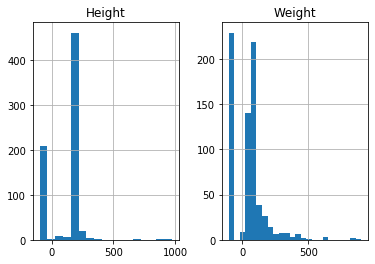

In [108]:
heroes_df.hist(bins='auto')

In [109]:
heroes_df.loc[(heroes_df['Weight']<0)]#,(heroes_df['Weight']<0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
723,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0


In [110]:
str_cols = list(heroes_df.select_dtypes('object').columns)
str_cols

['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Publisher',
 'Skin color',
 'Alignment']

In [111]:
for col in str_cols:
    display(heroes_df[col].value_counts(dropna=False))
    print()

Kang           1
Rhino          1
Longshot       1
Omega Red      1
Bird-Man       1
              ..
Ripcord        1
Atlas          1
Batgirl IV     1
Vixen          1
Thunderbird    1
Name: name, Length: 715, dtype: int64

Male      491
Female    196
-          28
Name: Gender, dtype: int64

blue                       220
-                          165
brown                      125
green                       71
red                         45
black                       22
yellow                      19
white                       16
hazel                        6
grey                         5
purple                       4
gold                         3
yellow (without irises)      2
violet                       2
amber                        2
silver                       1
yellow / red                 1
green / blue                 1
bown                         1
blue / white                 1
indigo                       1
white / red                  1
yellow / blue                1
Name: Eye color, dtype: int64

-                 300
Human             199
Mutant             63
God / Eternal      13
Cyborg             11
                 ... 
Maiar               1
Human / Cosmic      1
Zombie              1
Vampire             1
Kaiju               1
Name: Race, Length: 62, dtype: int64

-                   166
Black               154
Blond                97
Brown                82
No Hair              75
Red                  49
White                23
Auburn               12
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Brown / White         4
Silver                4
blond                 3
Blue                  3
black                 3
Yellow                2
Orange                2
Brown / Black         1
Red / Orange          1
Black / Blue          1
Pink                  1
Orange / White        1
Magenta               1
Red / Grey            1
Indigo                1
Red / White           1
Gold                  1
Brownn                1
Name: Hair color, dtype: int64

Marvel Comics        379
DC Comics            206
NBC - Heroes          19
Dark Horse Comics     17
NaN                   15
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
J. R. R. Tolkien       1
Microsoft              1
South Park             1
Titan Books            1
J. K. Rowling          1
Name: Publisher, dtype: int64

-                 644
green              21
red                 9
blue                9
white               7
grey                5
silver              5
purple              3
gold                2
pink                2
yellow              2
orange              1
orange / white      1
red / black         1
black               1
gray                1
blue-white          1
Name: Skin color, dtype: int64

good       479
bad        205
neutral     24
-            7
Name: Alignment, dtype: int64

In [112]:
placeholders = ['-',-99.0]
heroes_df.replace(placeholders,np.nan, inplace=True)#.isna().sum()

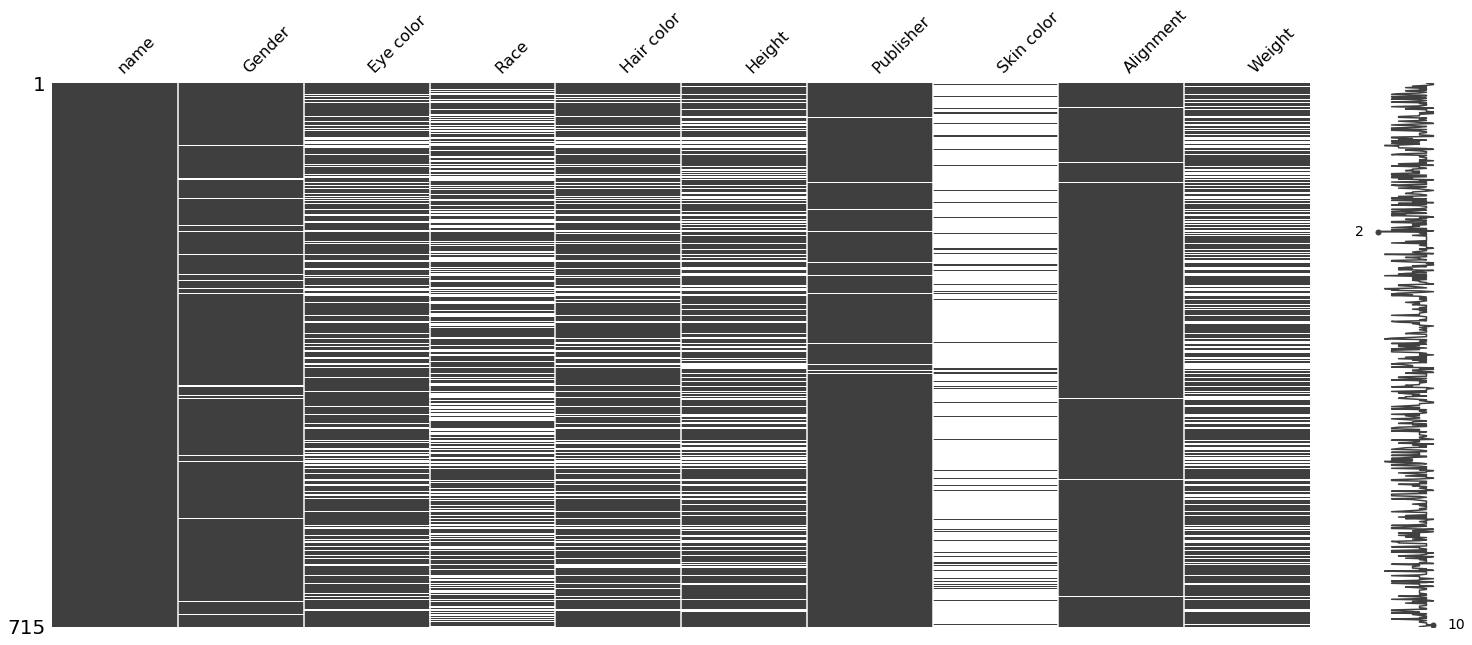

In [113]:
# !pip install missingno
import missingno as ms
ms.matrix(heroes_df)

In [114]:
num_cols = heroes_df.select_dtypes('number').columns
for col in num_cols:
    heroes_df[col] = heroes_df[col].fillna(heroes_df[col].median())
    

In [115]:
heroes_df.isna().sum()/len(heroes_df)*100

name           0.000000
Gender         3.916084
Eye color     23.076923
Race          41.958042
Hair color    23.216783
Height         0.000000
Publisher      2.097902
Skin color    90.069930
Alignment      0.979021
Weight         0.000000
dtype: float64

In [116]:
heroes_df.dropna(subset=['Alignment','Publisher'],inplace=True)
heroes_df.isna().sum()

name            0
Gender         25
Eye color     154
Race          293
Hair color    155
Height          0
Publisher       0
Skin color    625
Alignment       0
Weight          0
dtype: int64

In [117]:
race_dist = heroes_df['Race'].value_counts(normalize=True)
race_dist

Human                 0.483791
Mutant                0.154613
God / Eternal         0.027431
Human / Radiation     0.027431
Cyborg                0.024938
Android               0.022444
Kryptonian            0.017456
Alien                 0.014963
Symbiote              0.014963
Demon                 0.014963
Asgardian             0.012469
Alpha                 0.012469
Cosmic Entity         0.009975
Atlantean             0.009975
Inhuman               0.009975
Animal                0.007481
Human / Altered       0.007481
New God               0.007481
Demi-God              0.004988
Human-Kree            0.004988
Frost Giant           0.004988
Saiyan                0.004988
Eternal               0.004988
Amazon                0.004988
Spartoi               0.002494
Strontian             0.002494
Human-Vulcan          0.002494
Korugaran             0.002494
Human-Vuldarian       0.002494
Kakarantharaian       0.002494
Parademon             0.002494
Ungaran               0.002494
Metahuma

In [118]:
res = heroes_df.isna().sum()#.apply()
null_cols = res[res>0].index

In [123]:
null_cols

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color'], dtype='object')

In [119]:
idx = heroes_df['Gender'].isna()
# heroes_df.loc[idx,'Gender'] = "missing"
heroes_df['Gender'].value_counts()

Male      475
Female    194
Name: Gender, dtype: int64

In [124]:
for col in null_cols:
    val_counts = heroes_df[col].value_counts(normalize=True)
    idx = heroes_df[col].isna()
    heroes_df.loc[idx,col] = heroes_df.loc[idx,col].apply(lambda x: np.random.choice(val_counts.index,
                                                           p=val_counts.values))

In [126]:
heroes_df['Race'].value_counts(normalize=True)

Human                 0.492795
Mutant                0.152738
Human / Radiation     0.031700
God / Eternal         0.023055
Cyborg                0.023055
Kryptonian            0.020173
Android               0.020173
Symbiote              0.018732
Alpha                 0.015850
Cosmic Entity         0.012968
Alien                 0.012968
Atlantean             0.011527
Demon                 0.010086
Asgardian             0.010086
Inhuman               0.010086
Animal                0.008646
Amazon                0.007205
Tamaranean            0.007205
Human / Altered       0.007205
Yoda's species        0.005764
Human-Kree            0.005764
New God               0.005764
Saiyan                0.005764
Demi-God              0.005764
Flora Colossus        0.004323
Human-Vuldarian       0.004323
Frost Giant           0.002882
Eternal               0.002882
Human-Spartoi         0.002882
Zombie                0.002882
Ungaran               0.002882
Gungan                0.002882
Planet  

In [125]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [127]:
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,white,bad,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [129]:
pd.set_option('display.max_columns',0)

In [130]:
df = pd.merge(heroes_df, powers_df, left_on='name', right_on='hero_names')
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,...,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,white,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [131]:
male_heroes_df = df.groupby('Gender').get_group('Male')
female_heroes_df = df.groupby('Gender').get_group('Female')
display(male_heroes_df.head(),female_heroes_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,...,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,white,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,...,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,grey,good,57.0,Angel Dust,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22,Angel Salvadore,Female,brown,Human / Radiation,Black,163.0,Marvel Comics,red,good,54.0,Angel Salvadore,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,Angela,Female,black,Human,Black,183.0,Image Comics,gold,bad,81.0,Angela,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,grey,good,63.0,Arachne,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
36,Arclight,Female,violet,Human,Purple,173.0,Marvel Comics,blue,bad,57.0,Arclight,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [132]:
import seaborn as sns

In [136]:
def show_distplot(dataframe, gender, column_name,plot_col):
    df_ = df.groupby(column_name).get_group(gender)
    ax = sns.distplot(df_[plot_col])
    ax.set_title(f"Grouped by {column_name}- ({gender})")

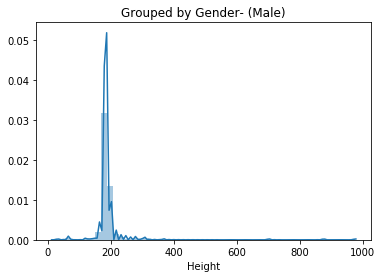

In [137]:
# Male Height
show_distplot(df,'Male','Gender','Height')

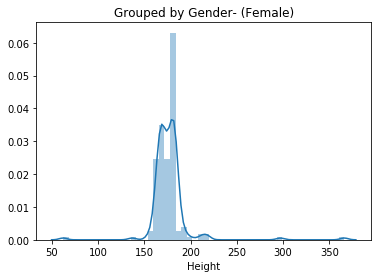

In [139]:
# Female Height
show_distplot(df,'Female','Gender','Height')

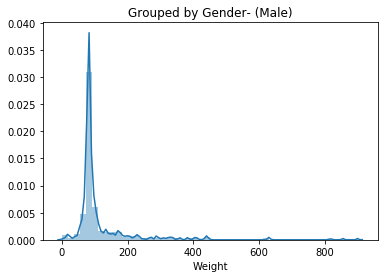

In [138]:
# Male Weight
show_distplot(df,'Male','Gender','Weight')

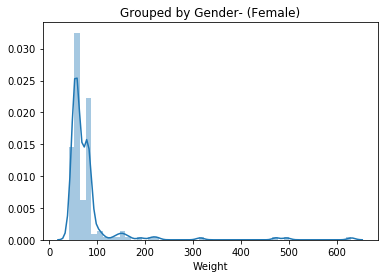

In [140]:
# Female Weight
show_distplot(df,'Female','Gender','Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



## To Be Continued...

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data